# Generating Synthetic data with CTGAN

Let's generate 200 entries, using sample california_housing_train.csv 
data from Kaggle at:

https://www.kaggle.com/datasets/camnugent/california-housing-prices

# 1. Install Dependencies

We will install 'ctgan' and 'table_evaluator' packages

In [1]:
#!pip install ctgan

In [2]:
#pip install table_evaluator

In [3]:
#pip install ipython

In [4]:
import pandas as pd
import numpy as np
from ctgan import CTGAN
from table_evaluator import TableEvaluator
import warnings

# 2. Load Data

Load the California Housing Training dataset, and display the first few
rows to understand its structure

In [5]:
data = pd.read_csv("content/sample_data/california_housing_train.csv")

In [6]:
data.replace([np.inf, -np.inf], np.nan)
# Since dataset contains infinite values we can preprocess the data
# by converting infinite values to 'NaN' before passing it to seaborn 
# down below

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [7]:
# Display First few rows of the dataset
print("Original Data:")
print(data.head())

Original Data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


# 3. Train CTGAN
Initialize and train CTGAN model on the dataset

Now that the data is loaded, let's use ctgan to generate the data with 500 observations

CTGAN takes some time, depending on system may be up to 10 minutes

In [8]:
ctgan = CTGAN(epochs=500, verbose=True)
ctgan.fit(data)

Gen. (0.02) | Discrim. (-0.12): 100%|██████████| 500/500 [08:10<00:00,  1.02it/s] 


# 4. Generate Synthetic Samples

Generated synthetic data samples and display them to verify

In [9]:
samples = ctgan.sample(200)

In [10]:
# Replace infinite values in synthetic data with NaN
samples.replace([np.inf, -np.inf], np.nan)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-118.333346,34.222871,20.072287,5060.403434,499.087716,1891.875884,689.517220,5.857524,333687.318266
1,-118.516107,34.087160,31.421403,1215.172164,315.760008,641.826304,321.647548,5.380057,360995.301001
2,-120.167131,37.708283,50.646953,2053.598581,273.302048,573.933204,401.817890,2.201597,110097.942475
3,-119.790390,34.091203,5.526750,5472.192450,1158.637904,4856.521455,1246.067254,5.467633,343461.101820
4,-118.389256,33.929257,39.364736,2992.053022,784.355027,2055.055697,838.121593,1.723740,183905.805742
...,...,...,...,...,...,...,...,...,...
195,-122.752559,38.113289,47.153034,481.227223,33.779367,145.890495,-0.101293,2.587705,404271.768216
196,-117.542404,33.845982,25.735285,1243.517225,199.088787,522.590852,194.429170,4.448531,202232.414839
197,-118.206034,34.531084,41.484900,1275.648899,283.484251,625.938693,310.773872,2.529446,79919.989346
198,-122.040420,37.870635,28.485113,3111.360664,625.270545,2199.728813,588.712992,5.314381,413753.517133


In [11]:
# Display first few rows of synthetic samples
print("Synthetic Data:")
print(samples.head())

Synthetic Data:
    longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -118.333346  34.222871           20.072287  5060.403434      499.087716   
1 -118.516107  34.087160           31.421403  1215.172164      315.760008   
2 -120.167131  37.708283           50.646953  2053.598581      273.302048   
3 -119.790390  34.091203            5.526750  5472.192450     1158.637904   
4 -118.389256  33.929257           39.364736  2992.053022      784.355027   

    population   households  median_income  median_house_value  
0  1891.875884   689.517220       5.857524       333687.318266  
1   641.826304   321.647548       5.380057       360995.301001  
2   573.933204   401.817890       2.201597       110097.942475  
3  4856.521455  1246.067254       5.467633       343461.101820  
4  2055.055697   838.121593       1.723740       183905.805742  


# 5. Evaluate Synthetic Data

Using "table_evaluator" to compare synthetic data with the original data

Now, let's compare how the data matches with the original data.

We will use Table_evaluator to test this

In [12]:
# Evaluate the synthetic data against original data
print("Shape of original data:", data.shape)
print("Shape of synthetic data:", samples.shape)

Shape of original data: (17000, 9)
Shape of synthetic data: (200, 9)


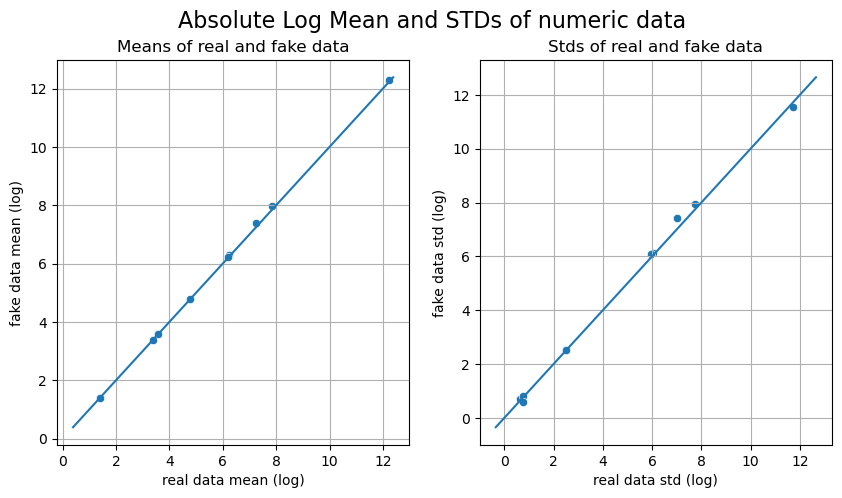

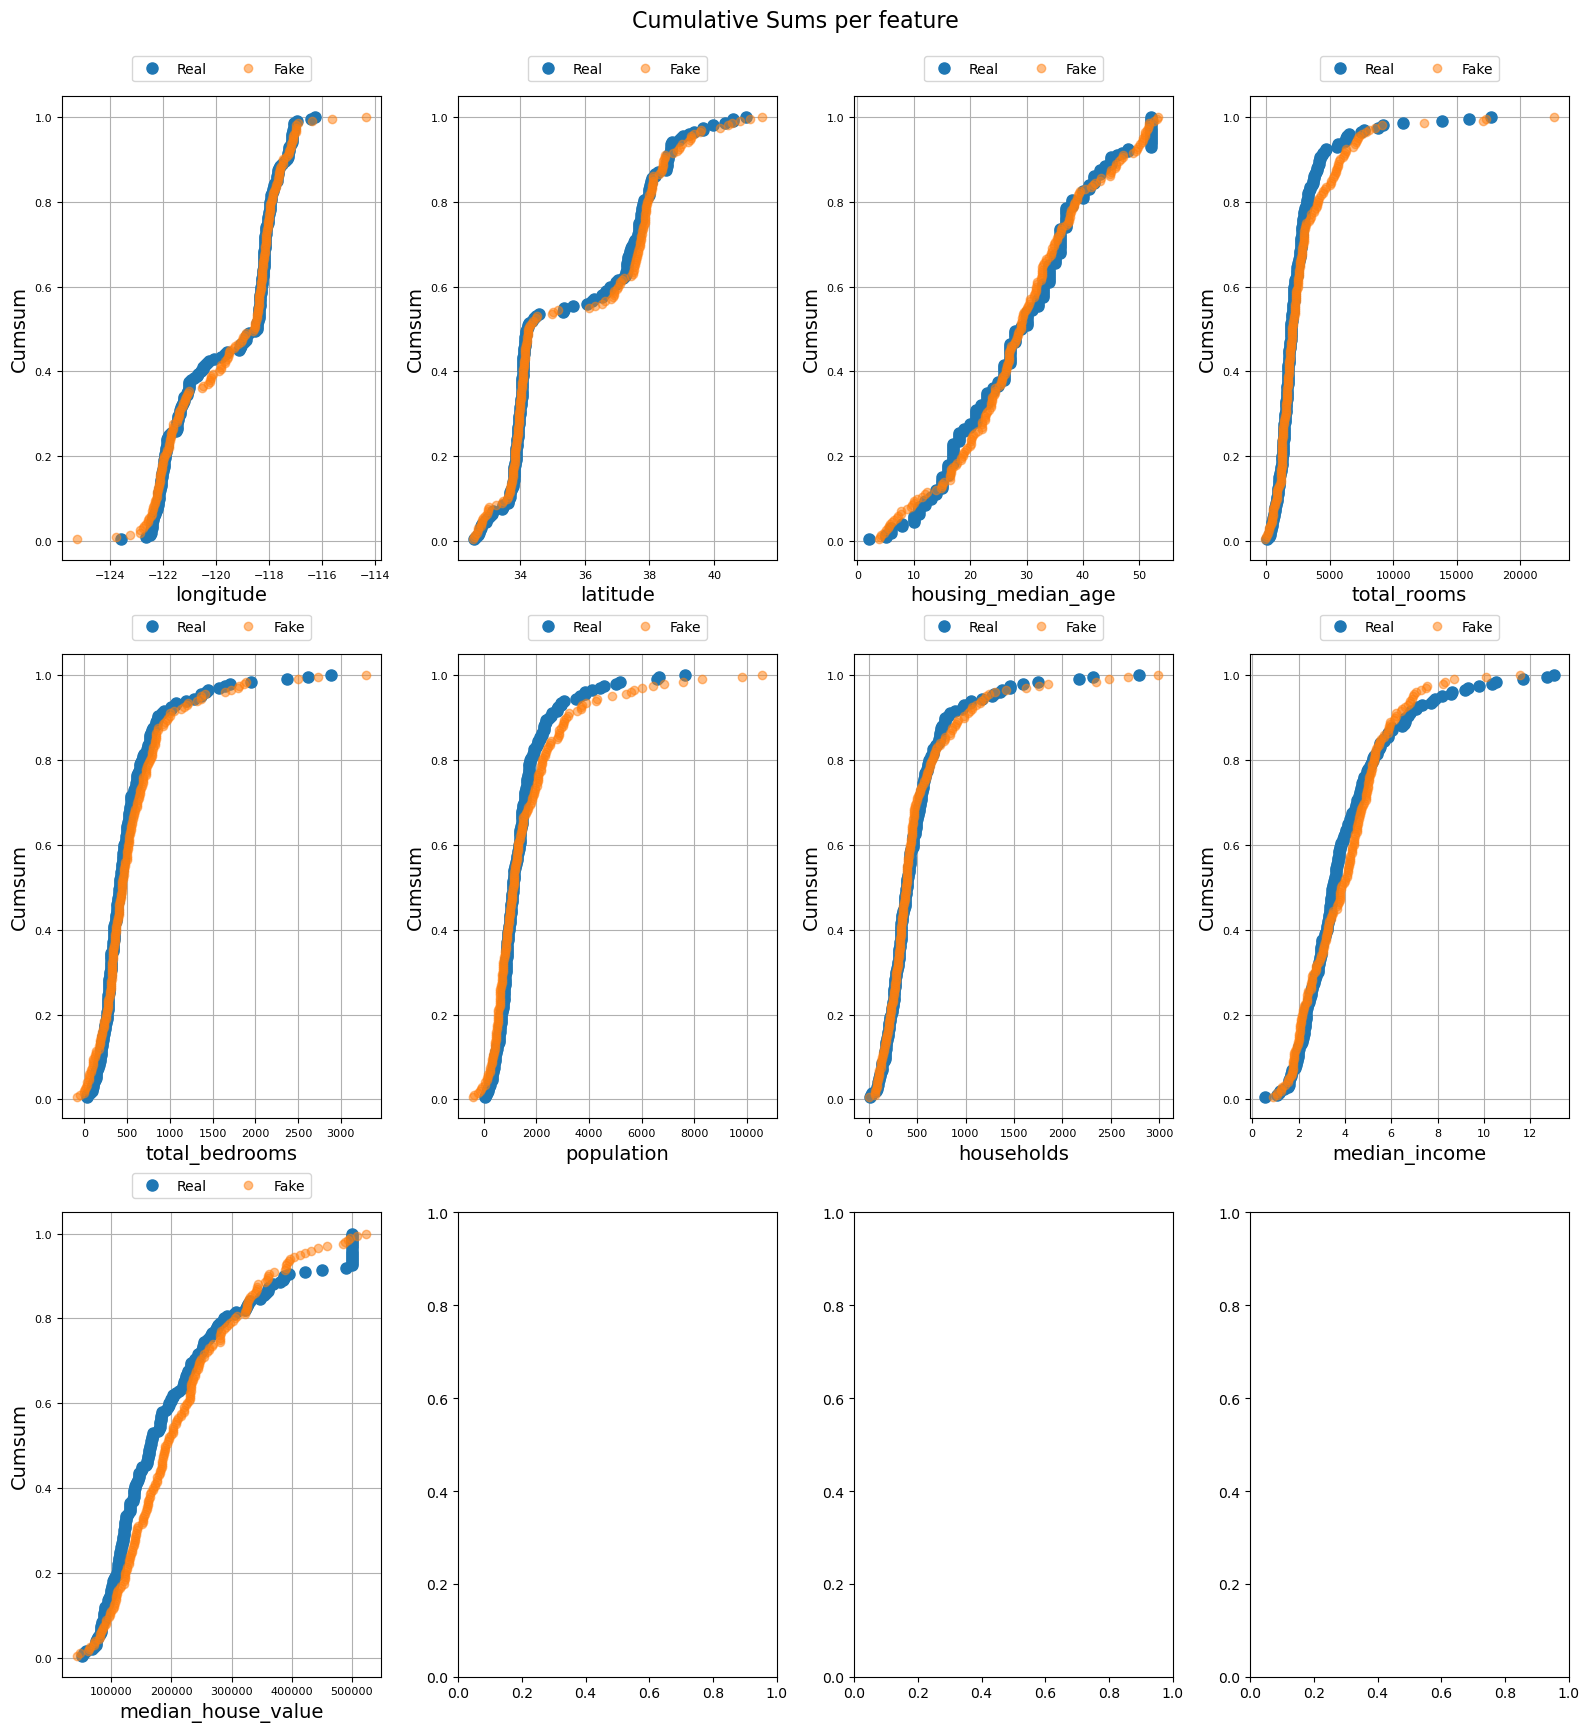

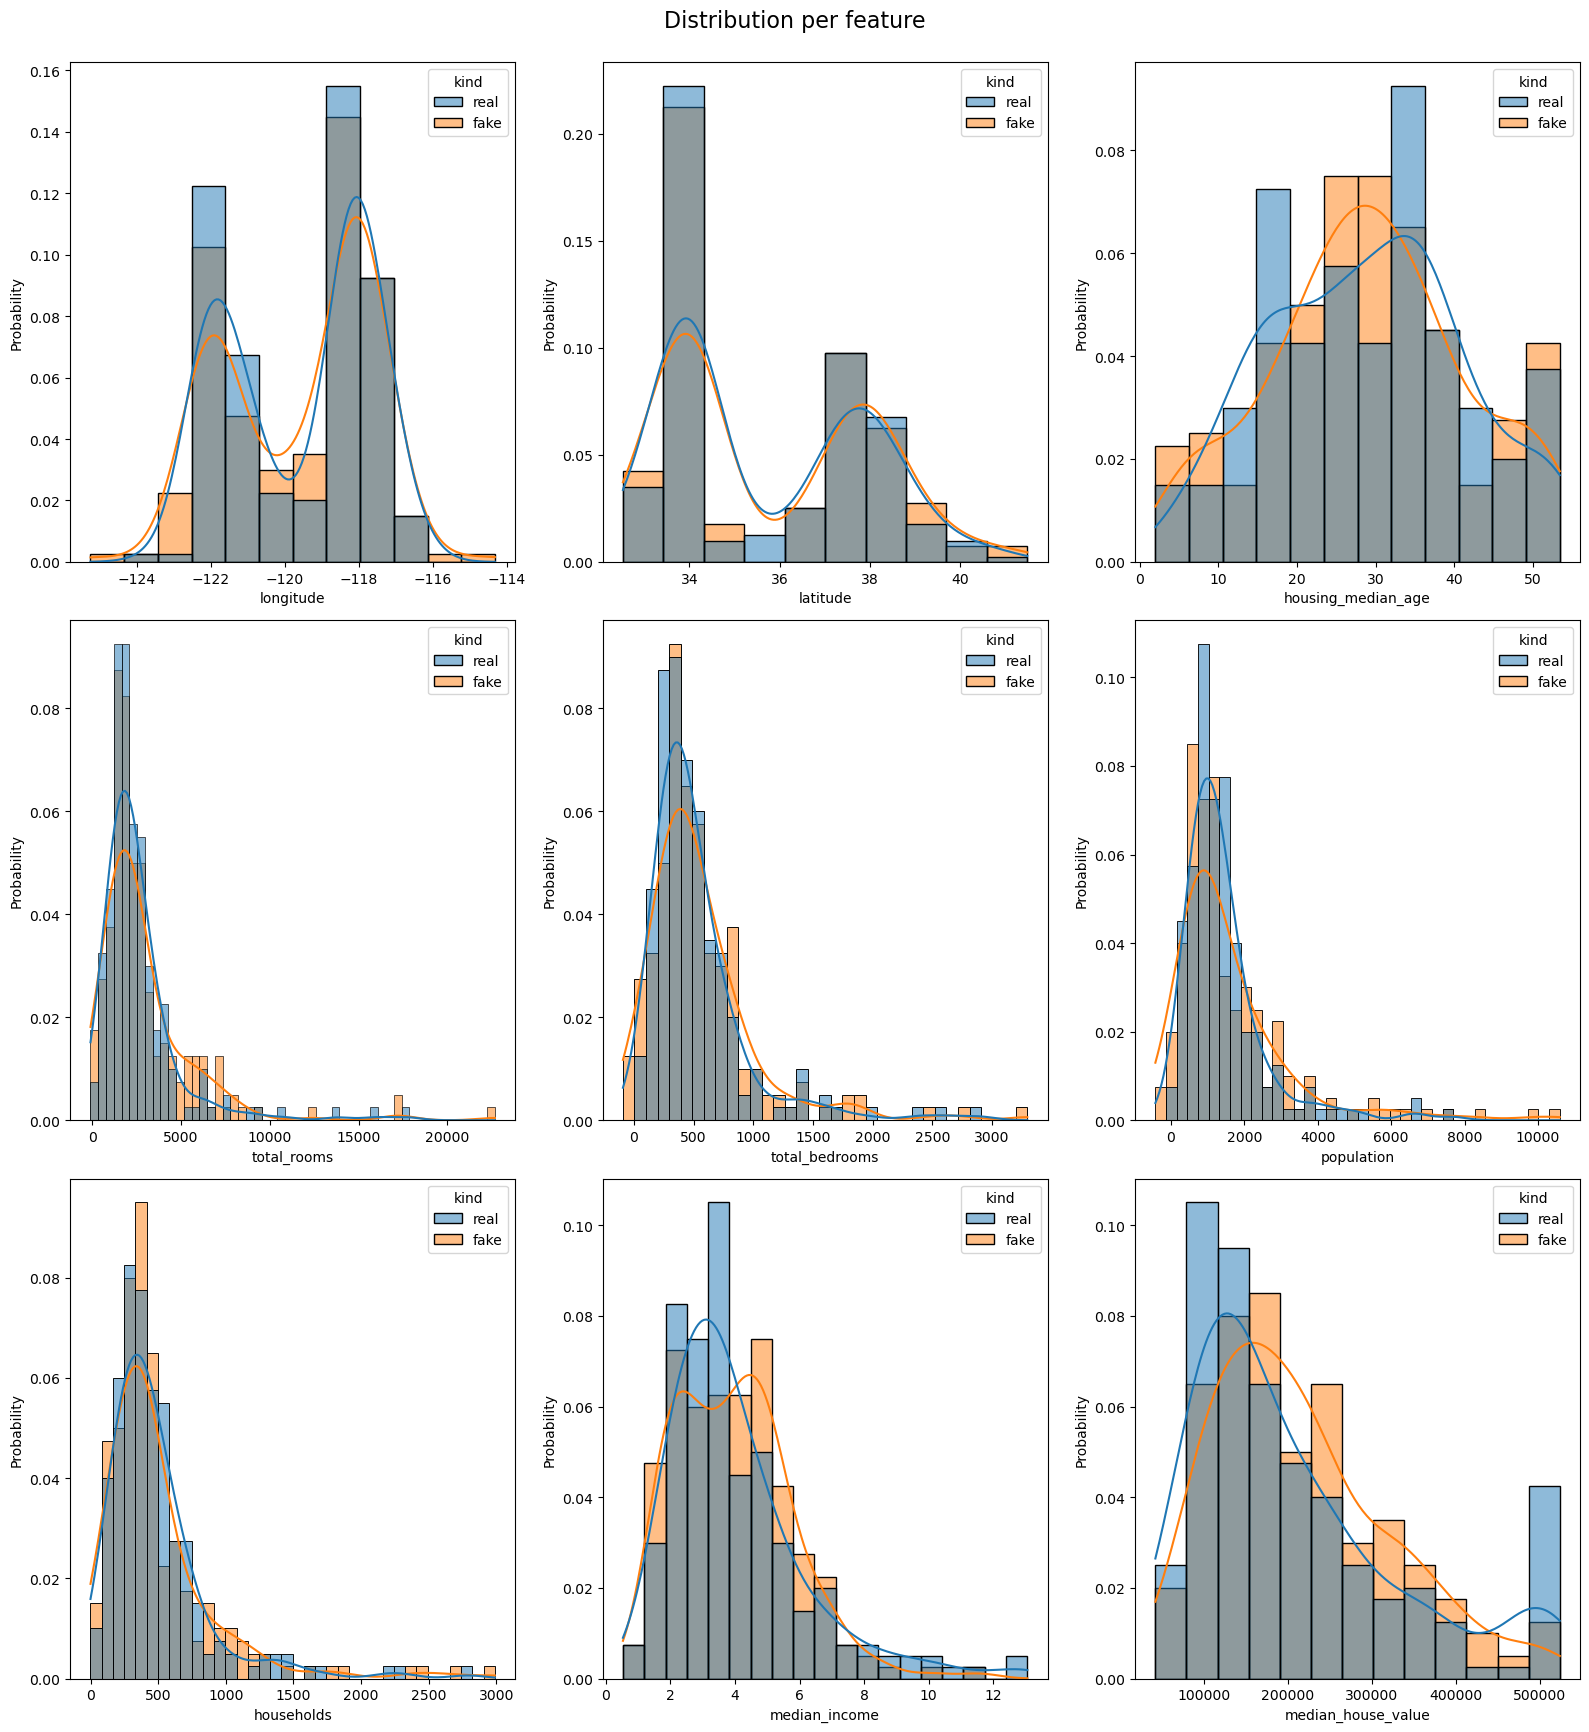

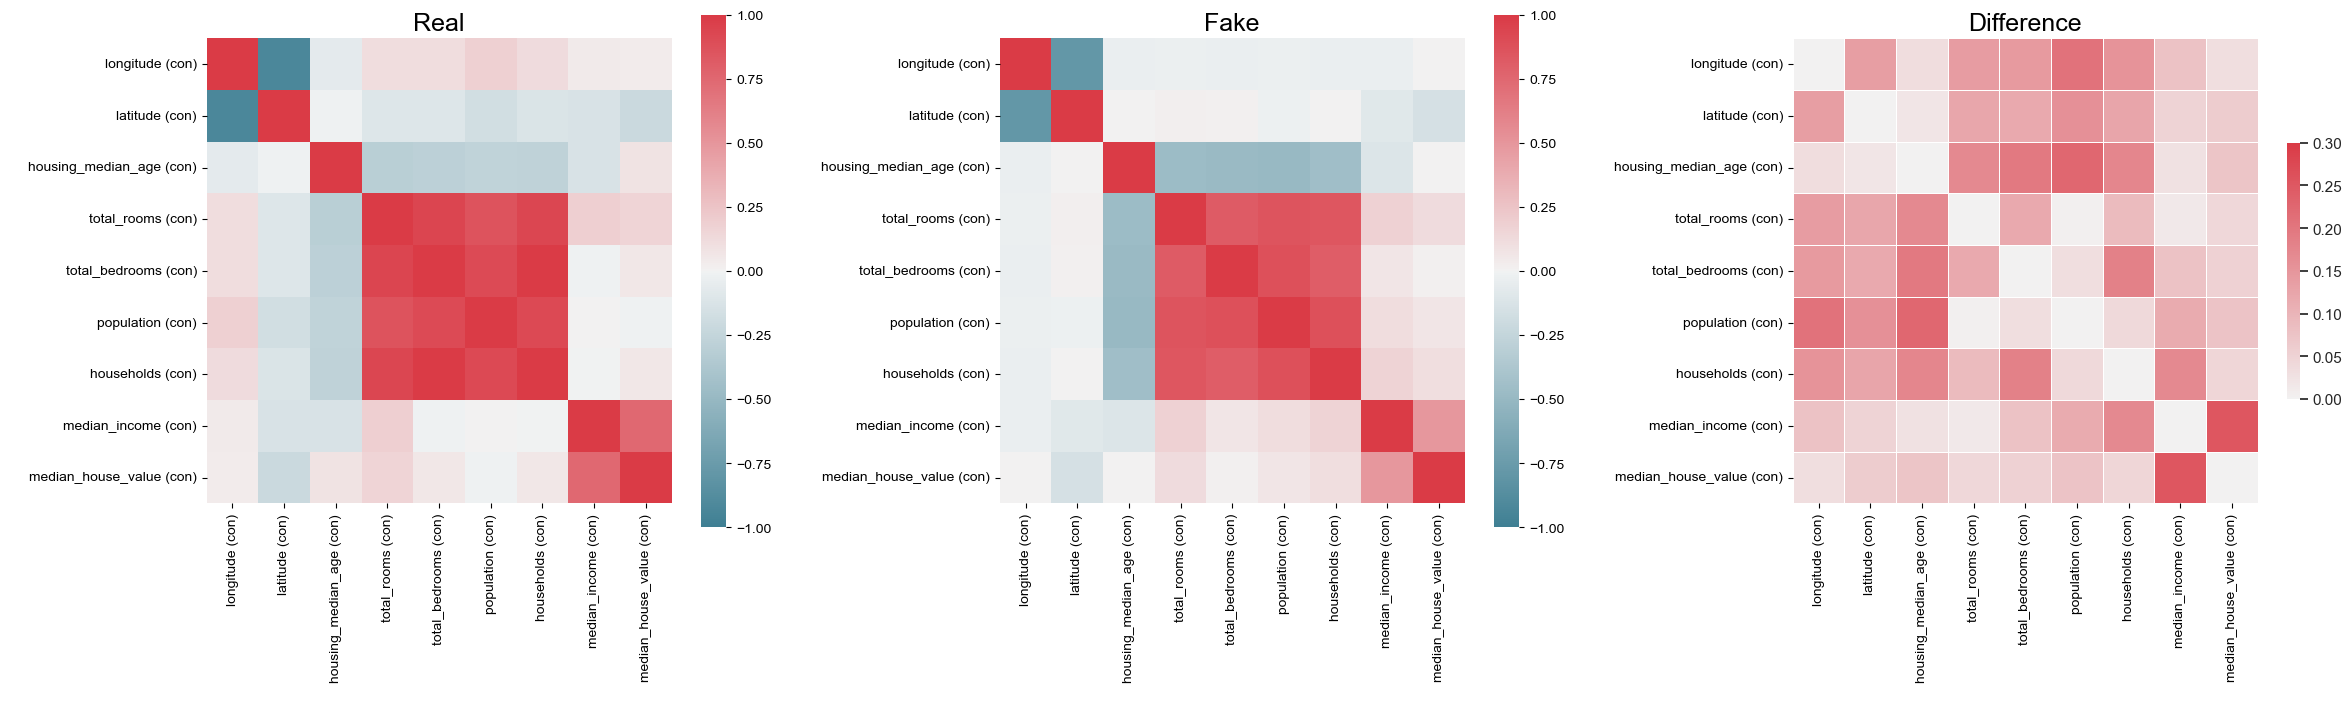

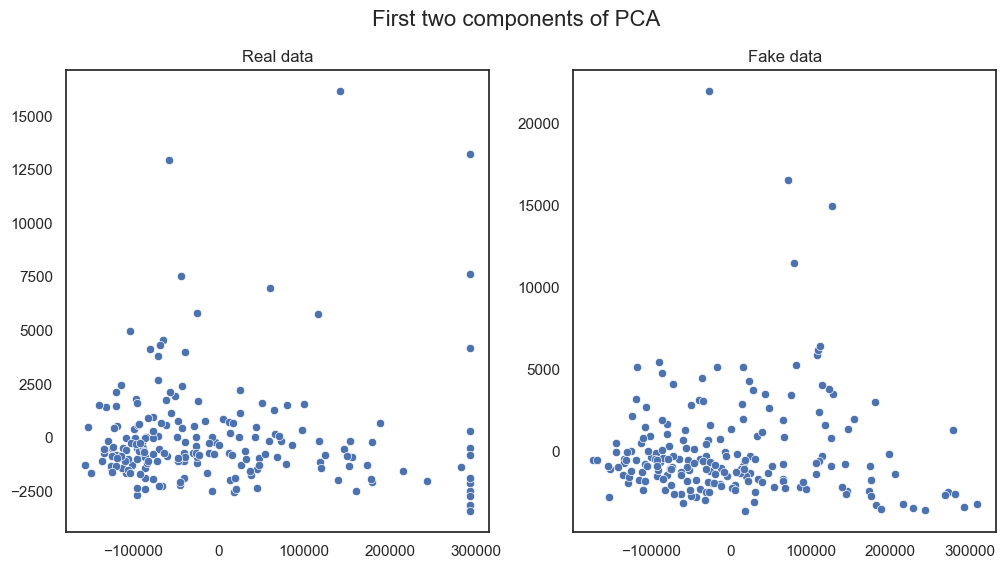

In [13]:
warnings.filterwarnings("ignore", category=FutureWarning)
# Table evaluator is giving a future warning, so above code
# will supress all warnings globally
table_evaluator = TableEvaluator(data, samples)
table_evaluator.visual_evaluation()

# 6. Export Augmented Data to CSV

Great! Our new data matches very closely with the statistical distributions of our original data.

Here is our new augmented data set!

Now, let's just export to csv

In [14]:
# Save synthetic samples to CSV
samples.to_csv('samples.csv')

## Additional Tips:

1. __Hyperparameter Tuning:__ Experiment with different hyperparameters (e.g., batch size, learning rate, epochs) to improve the quality of the synthetic data.
2. __Feature Engineering__: Ensure that any necessary feature engineering steps are applied to both the original and synthetic data for a fair comparison.
3. __Evaluation Metrics__: Use additional evaluation metrics provided by TableEvaluator to assess the quality of the synthetic data comprehensively.

## Visual Evaluation

The __TableEvaluator__ provides visualizations to help understand the similarities and differences between the original and synthetic datasets. This includes comparisons of distributions, correlations, and other statistical properties.